In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer/benign/0664.jpg
/kaggle/input/skin-cancer/benign/1269.jpg
/kaggle/input/skin-cancer/benign/0733.jpg
/kaggle/input/skin-cancer/benign/0106.jpg
/kaggle/input/skin-cancer/benign/0375.jpg
/kaggle/input/skin-cancer/benign/1700.jpg
/kaggle/input/skin-cancer/benign/1786.jpg
/kaggle/input/skin-cancer/benign/1075.jpg
/kaggle/input/skin-cancer/benign/0285.jpg
/kaggle/input/skin-cancer/benign/1789.jpg
/kaggle/input/skin-cancer/benign/0591.jpg
/kaggle/input/skin-cancer/benign/1792.jpg
/kaggle/input/skin-cancer/benign/0799.jpg
/kaggle/input/skin-cancer/benign/1411.jpg
/kaggle/input/skin-cancer/benign/0074.jpg
/kaggle/input/skin-cancer/benign/1031.jpg
/kaggle/input/skin-cancer/benign/0077.jpg
/kaggle/input/skin-cancer/benign/0498.jpg
/kaggle/input/skin-cancer/benign/1749.jpg
/kaggle/input/skin-cancer/benign/0610.jpg
/kaggle/input/skin-cancer/benign/1501.jpg
/kaggle/input/skin-cancer/benign/1385.jpg
/kaggle/input/skin-cancer/benign/0617.jpg
/kaggle/input/skin-cancer/benign/1

In [3]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2025-10-28 12:02:36.881532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761652956.904663    3807 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761652956.911885    3807 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
data_dir = "/kaggle/input/skin-cancer" 

# Step 3: Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

In [5]:
# Step 4: Creating ImageDataGenerator for train/validation
datagen = ImageDataGenerator(
    rescale=1./255,            # normalize pixel values
    rotation_range=20,         # random rotation
    width_shift_range=0.1,     # shift width
    height_shift_range=0.1,    # shift height
    zoom_range=0.1,            # random zoom
    horizontal_flip=True,      # flip horizontally
    validation_split=0.2       # 80-20 train/validation split
)

In [6]:
# Step 5: Creating train and validation generators
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=SEED
)

Found 2638 images belonging to 2 classes.


In [7]:
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=SEED
)


Found 659 images belonging to 2 classes.


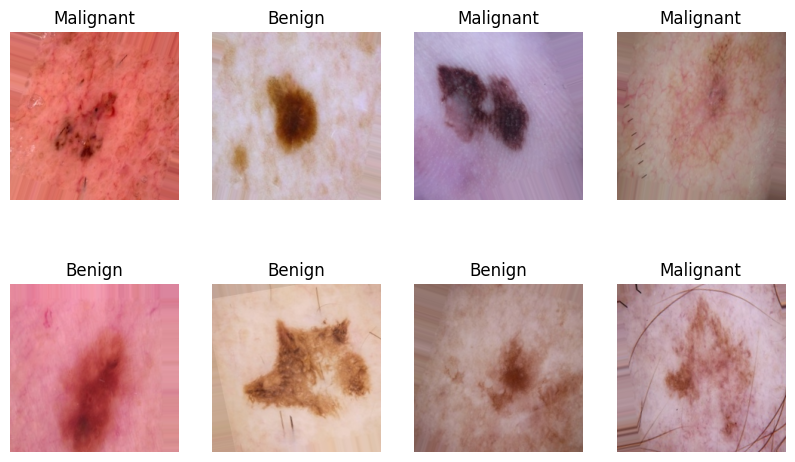

In [8]:
# Step 6: Visualizing few training images
x_batch, y_batch = next(train_data)
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_batch[i])
    plt.title("Benign" if y_batch[i] == 0 else "Malignant")
    plt.axis('off')
plt.show()

Class indices: {'benign': 0, 'malignant': 1}


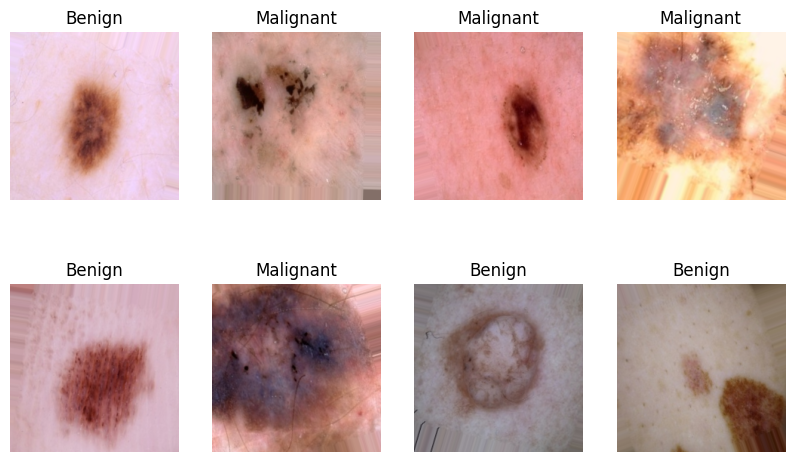

In [9]:
# Checking  folder-to-label mapping
print("Class indices:", train_data.class_indices)

# Visualize images with correct titles
x_batch, y_batch = next(train_data)
plt.figure(figsize=(10,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_batch[i])
    label = "Benign" if y_batch[i] == 0 else "Malignant"
    plt.title(label)
    plt.axis('off')
plt.show()


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Defining CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # prevent overfitting
    Dense(1, activation='sigmoid')  # binary classification output
])

# Step 2: Compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761652962.144699    3807 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761652962.145400    3807 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 4: Training the model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1761652966.402312    3861 service.cc:148] XLA service 0x78f8c8005ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761652966.402366    3861 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761652966.402371    3861 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761652966.670974    3861 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/83 ━━━━━━━━━━━━━━━━━━━━ 10:07 7s/step - accuracy: 0.4062 - loss: 0.6993

I0000 00:00:1761652971.100013    3861 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 510ms/step - accuracy: 0.6098 - loss: 0.7609 - val_accuracy: 0.7891 - val_loss: 0.5022
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 454ms/step - accuracy: 0.7773 - loss: 0.4819 - val_accuracy: 0.8058 - val_loss: 0.3841
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 458ms/step - accuracy: 0.7909 - loss: 0.4199 - val_accuracy: 0.7830 - val_loss: 0.4573
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 461ms/step - accuracy: 0.7773 - loss: 0.4515 - val_accuracy: 0.7997 - val_loss: 0.3813
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 37s 451ms/step - accuracy: 0.7911 - loss: 0.4388 - val_accuracy: 0.7860 - val_loss: 0.4397
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 37s 449ms/step - accuracy: 0.7962 - loss: 0.4155 - val_accuracy: 0.7951 - val_loss: 0.3688
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 452ms/step - accuracy: 0.7937 - loss: 0.4103 - val_accuracy: 0.8058 - val_loss: 0.3557
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 461ms/step - accuracy: 0.8080 - loss: 0.3999 - val_accuracy: 0.804

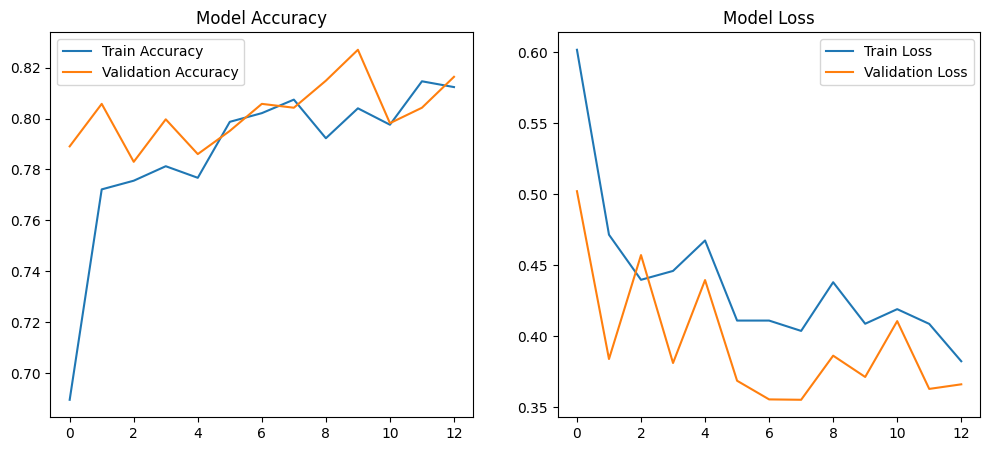

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.8042 - loss: 0.3510

Validation Accuracy: 80.88%


In [12]:
# Step 5: Ploting accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Step 6: Evaluating final accuracy
val_loss, val_acc = model.evaluate(val_data)
print(f"\nValidation Accuracy: {val_acc*100:.2f}%")


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 439ms/step


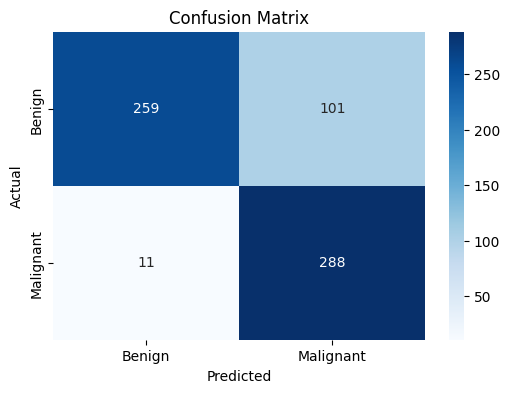

              precision    recall  f1-score   support

      Benign       0.96      0.72      0.82       360
   Malignant       0.74      0.96      0.84       299

    accuracy                           0.83       659
   macro avg       0.85      0.84      0.83       659
weighted avg       0.86      0.83      0.83       659



In [34]:
#Step7 evaluating the model with the testing data
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred = np.where(y_pred > 0.45, 1, 0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))


In [14]:
#Preprocessing again to improve accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [15]:
#Building model with Transfer Learning method
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top classifier layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pretrained layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 69s 671ms/step - accuracy: 0.6671 - loss: 0.5987 - val_accuracy: 0.8134 - val_loss: 0.3938
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 480ms/step - accuracy: 0.8131 - loss: 0.4158 - val_accuracy: 0.8407 - val_loss: 0.4044
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - accuracy: 0.8254 - loss: 0.3864 - val_accuracy: 0.8376 - val_loss: 0.3752
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 475ms/step - accuracy: 0.8484 - loss: 0.3511 - val_accuracy: 0.8118 - val_loss: 0.4456
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 476ms/step - accuracy: 0.8323 - loss: 0.3746 - val_accuracy: 0.8483 - val_loss: 0.3695
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 468ms/step - accuracy: 0.8437 - loss: 0.3332 - val_accuracy: 0.8209 - val_loss: 0.3730
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 481ms/step - accuracy: 0.8539 - loss: 0.3223 - val_accuracy: 0.8407 - val_loss: 0.3501
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 473ms/step - accuracy: 0.8543 - loss: 0.3256 - val_accu

In [16]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 523ms/step - accuracy: 0.8691 - loss: 0.2993 - val_accuracy: 0.8452 - val_loss: 0.3434
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - accuracy: 0.8762 - loss: 0.2768 - val_accuracy: 0.8589 - val_loss: 0.3278
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 485ms/step - accuracy: 0.8799 - loss: 0.2663 - val_accuracy: 0.8452 - val_loss: 0.3452
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 470ms/step - accuracy: 0.8729 - loss: 0.2835 - val_accuracy: 0.8452 - val_loss: 0.3202
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 474ms/step - accuracy: 0.8892 - loss: 0.2507 - val_accuracy: 0.8543 - val_loss: 0.3328


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 409ms/step


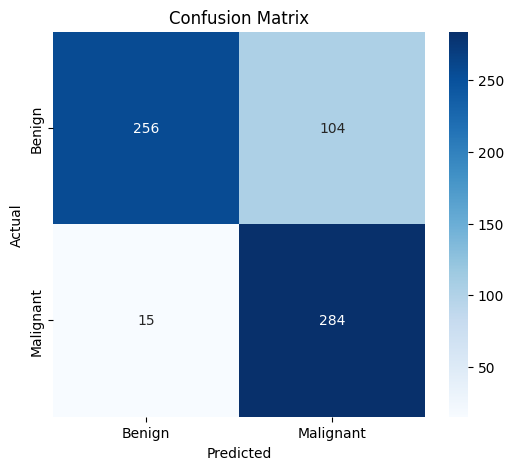

              precision    recall  f1-score   support

      Benign       0.94      0.71      0.81       360
   Malignant       0.73      0.95      0.83       299

    accuracy                           0.82       659
   macro avg       0.84      0.83      0.82       659
weighted avg       0.85      0.82      0.82       659



In [26]:
#Evaluating the model with the confusion matrix and classification_report 
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred = np.where(y_pred > 0.45, 1, 0)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))


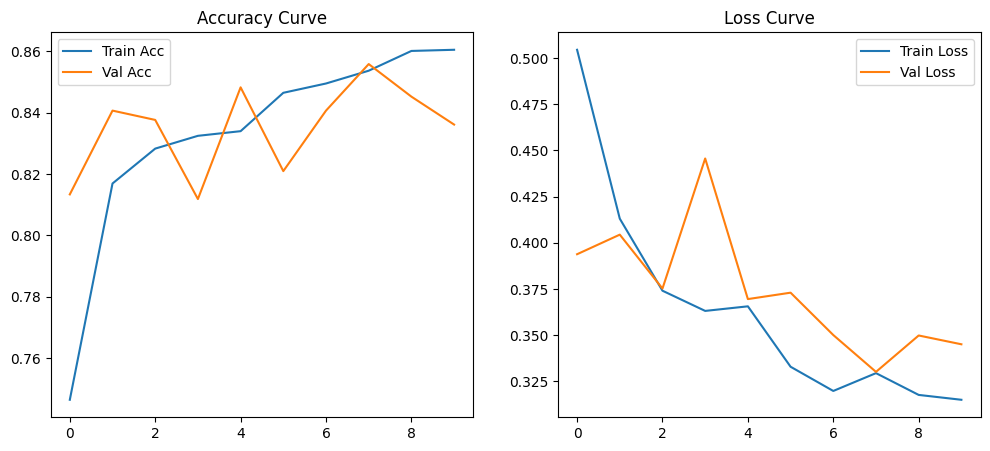

In [28]:
#Plotting the accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


In [29]:
#Adding the extra preprocessing technique to improve the model 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    '/kaggle/input/skin-cancer',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    '/kaggle/input/skin-cancer',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 2638 images belonging to 2 classes.
Found 659 images belonging to 2 classes.


In [30]:
#Training the model using Transfer learning method
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze all initially
for layer in base_model.layers:
    layer.trainable = False

model_vgg = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model_vgg.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_vgg.fit(train_data, validation_data=val_data, epochs=5)

# --- Fine-Tuning ---
for layer in base_model.layers[-8:]:
    layer.trainable = True

model_vgg.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_vgg.fit(train_data, validation_data=val_data, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 522ms/step - accuracy: 0.7021 - loss: 0.5674 - val_accuracy: 0.8103 - val_loss: 0.4100
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 481ms/step - accuracy: 0.8088 - loss: 0.4258 - val_accuracy: 0.8179 - val_loss: 0.3881
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 480ms/step - accuracy: 0.8218 - loss: 0.3848 - val_accuracy: 0.8361 - val_loss: 0.3729
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 480ms/step - accuracy: 0.8254 - loss: 0.3890 - val_accuracy: 0.8073 - val_loss: 0.3720
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 478ms/step - accuracy: 0.8324 - loss: 0.3703 - val_accuracy: 0.8300 - val_loss: 0.3626
Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 530ms/step - accuracy: 0.8313 - loss: 0.3607 - val_accuracy: 0.8331 - val_loss: 0.3389
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 514ms/step - accuracy: 0.8184 - loss: 0.3807 - val_accuracy: 0.8346 - val_loss: 0.3232
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 501ms/step - accuracy: 0.8513 - loss: 0.3170 - val_accuracy: 0.

Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 511ms/step - accuracy: 0.8651 - loss: 0.2833 - val_accuracy: 0.8467 - val_loss: 0.3085
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 508ms/step - accuracy: 0.8712 - loss: 0.2751 - val_accuracy: 0.8665 - val_loss: 0.2946
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 506ms/step - accuracy: 0.8719 - loss: 0.2766 - val_accuracy: 0.8589 - val_loss: 0.3027
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 512ms/step - accuracy: 0.8841 - loss: 0.2490 - val_accuracy: 0.8725 - val_loss: 0.3005
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 502ms/step - accuracy: 0.8773 - loss: 0.2561 - val_accuracy: 0.8680 - val_loss: 0.3024


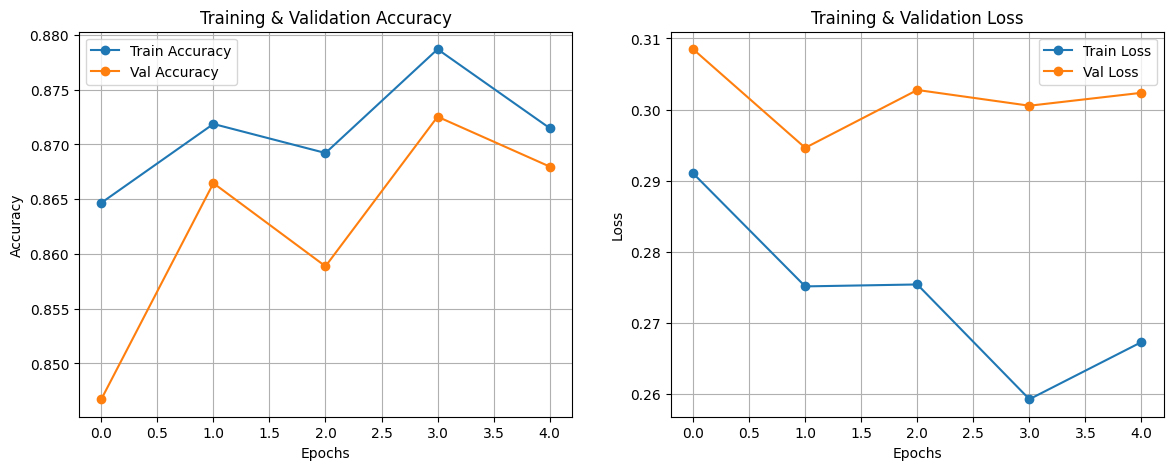

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step


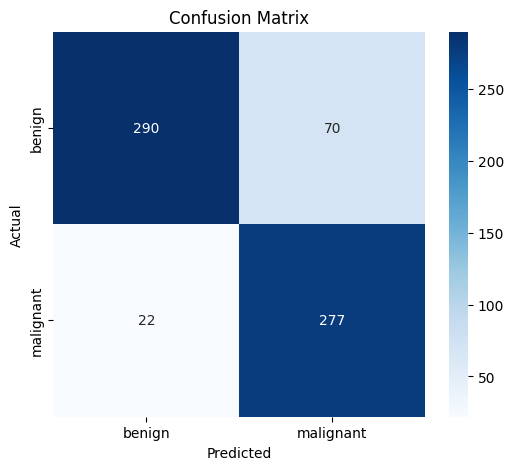


Classification Report:

              precision    recall  f1-score   support

      benign       0.93      0.81      0.86       360
   malignant       0.80      0.93      0.86       299

    accuracy                           0.86       659
   macro avg       0.86      0.87      0.86       659
weighted avg       0.87      0.86      0.86       659



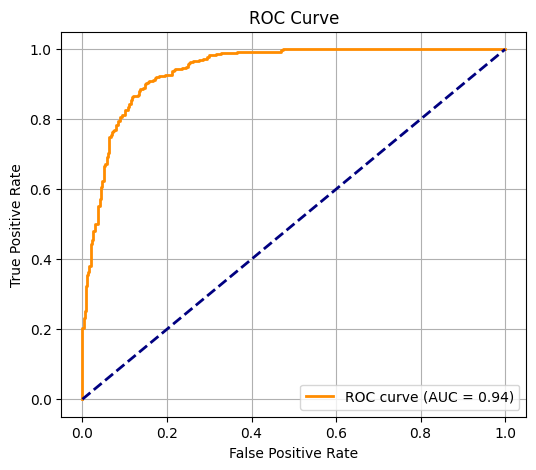

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# --- 1️⃣ Ploting training & validation curves ---
history = model_vgg.fit(train_data, validation_data=val_data, epochs=5)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- 2️⃣ Generating predictions ---
y_pred = model_vgg.predict(val_data)
y_pred_class = (y_pred > 0.45).astype("int32")  

# --- 3️⃣ Get true labels ---
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

# --- 4️⃣ Confusion matrix ---
cm = confusion_matrix(y_true, y_pred_class)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 5️⃣ Classification report ---
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_class, target_names=class_labels))

# --- 6️⃣ ROC Curve & AUC ---
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


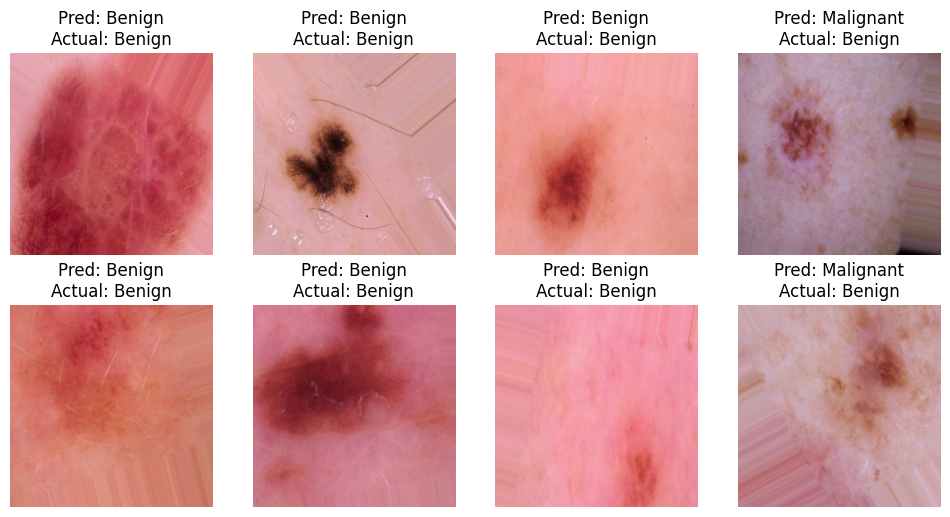

In [33]:
#checking the model how it actual predicting on different input samples 
import matplotlib.pyplot as plt

x_batch, y_batch = next(val_data)
preds = model_vgg.predict(x_batch)
preds = (preds > 0.45).astype("int32")

plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Pred: {'Benign' if preds[i]==0 else 'Malignant'}\nActual: {'Benign' if y_batch[i]==0 else 'Malignant'}")
    plt.axis('off')
plt.show()


In [7]:
#Saved the model
model_vgg.save("/kaggle/skin/skin_cancer_vgg16_model.h5")
print("✅ Model saved successfully!")


NameError: name 'model_vgg' is not defined

In [3]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# 🔹 Load trained model
model = tf.keras.models.load_model("/kaggle/input/deep-learning-model/tensorflow2/default/1/skin_cancer_vgg16_model.h5")

# 🔹 Class labels
class_labels = {0: "Benign (Non-Cancerous)", 1: "Malignant (Cancerous)"}

# 🔹 Prediction function
def predict_skin_cancer(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    y_pred = model.predict(img_array)[0][0]
    label = 1 if y_pred > 0.45 else 0
    confidence = y_pred if label == 1 else 1 - y_pred

    result = class_labels[label]
    confidence_text = f"Confidence: {confidence*100:.2f}%"

    if label == 1:
        return f"⚠️ **{result}**\n\n🧬 {confidence_text}\n\nPlease consult a dermatologist for further evaluation."
    else:
        return f"✅ **{result}**\n\n🌿 {confidence_text}\n\nYour skin appears healthy and normal."

# 🎨 Custom CSS
custom_css = """
body { 
    font-family: 'Poppins', sans-serif; 
    background: linear-gradient(135deg, #f9f9fb 0%, #fcefee 100%);
}
.gradio-container {
    font-family: 'Poppins', sans-serif;
}
h1, h2, h3, p, label { 
    font-family: 'Poppins', sans-serif; 
}
.output-textbox { 
    font-size: 18px !important; 
    line-height: 1.6; 
    color: #222; 
    font-weight: 500; 
}
footer { visibility: hidden }
"""

# 🧬 App Title and Description
title = "🧬 SkinGuard AI"
description = """
### 🩺 Smart Skin Cancer Detection  
Upload a **clear photo** of your skin mole or lesion.  
Our AI will predict whether it's **Benign** or **Malignant**, along with confidence level.  

> ⚠️ *Disclaimer: This tool is for educational and awareness purposes only — not a medical diagnosis.*
"""

# ⚙️ Build Interface
with gr.Blocks(theme=gr.themes.Soft(primary_hue="pink", secondary_hue="rose"), css=custom_css) as demo:
    gr.Markdown(f"<h1 style='text-align:center; color:#1f4e79;'>{title}</h1>")
    gr.Markdown(description)
    
    with gr.Row():
        with gr.Column(scale=1):
            image_input = gr.Image(type="pil", label="Upload Skin Image")
            output_text = gr.Textbox(label="AI Diagnosis", lines=5, elem_classes=["output-textbox"])
            gr.Button("🔍 Analyze").click(predict_skin_cancer, inputs=image_input, outputs=output_text)

    gr.Markdown("""
    ---
    <div style='text-align:center; color:#555; font-size:15px; margin-top:10px;'>
    © 2025 <b>SkinGuard AI</b> | Developed by <b>Avesh Kharani</b> | For Awareness & Research Use Only
    </div>
    """)

demo.launch(debug=True)


I0000 00:00:1761738441.119235      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761738441.119933      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://b6a7d04a683332aae6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


I0000 00:00:1761738470.347377     104 service.cc:148] XLA service 0x7b8480005320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761738470.348281     104 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761738470.348299     104 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761738470.499840     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1761738472.879576     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b6a7d04a683332aae6.gradio.live
